<a href="https://colab.research.google.com/github/berberberk/timl-fs-2024/blob/main/TIML1_Visualisation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Скользящее окно

In [ ]:
import numpy as np

def sliding_window(x, w, step):
  A = []
  for i in range(0, len(x) - w + 1, step):
    A.append(list(x)[i:i+w])
  return A

In [ ]:
window = 3
step_s = 1
x1 = np.array([8, 1, 4, 5, -2, 5, 9, 0])
A1 = np.array([[8, 1, 4],
               [1, 4, 5],
               [4, 5, -2],
               [5, -2, 5],
               [-2, 5, 9],
               [5, 9, 0]])

print(np.array_equal(sliding_window(x1, w=window, step=step_s),A1))

window = 2
step_s = 4
x2 = np.array([8, 3, 4, 1, -6, 5, 9, 2, 10, 11, -14, 0])
A2 = np.array([[8, 3],
               [-6, 5],
               [10, 11]])

print(np.array_equal(sliding_window(x2, w=window, step=step_s),A2))

True
True


# Выданный набор данных о людях

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:


# Загрузка данных
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data"
columns = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status",
           "occupation", "relationship", "race", "sex", "capital-gain", "capital-loss",
           "hours-per-week", "native-country", "salary"]

data = pd.read_csv(url, header=None, names=columns, na_values="?", skipinitialspace=True)

data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [ ]:
# 1. Сколько мужчин и женщин представлено в наборе данных?
gender_counts = data['sex'].value_counts()
print("Мужчины и женщины:\n", gender_counts)


Мужчины и женщины:
 sex
Male      21790
Female    10771
Name: count, dtype: int64



Средний возраст женщин: 36.85823043357163


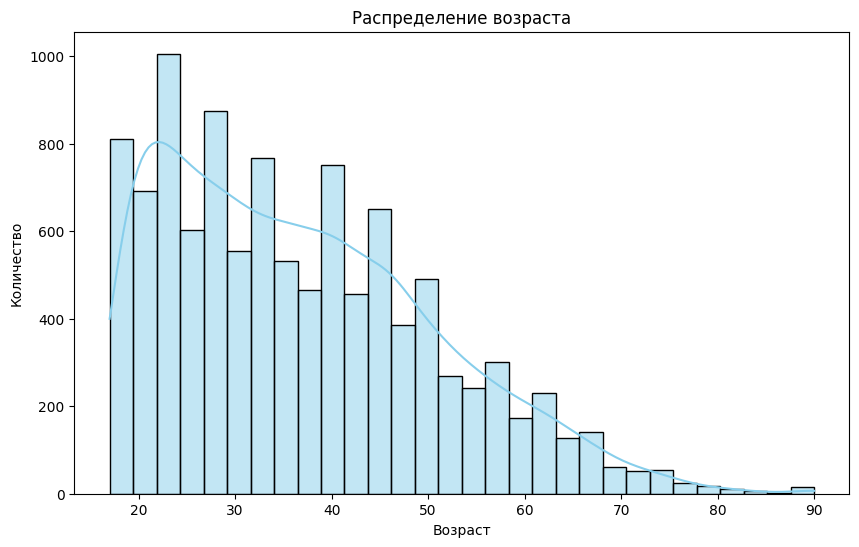

In [ ]:
# 2. Средний возраст женщин
mean_age_women = data[data['sex'] == 'Female']['age'].mean()
print("\nСредний возраст женщин:", mean_age_women)

plt.figure(figsize=(10, 6))
sns.histplot(data[data['sex'] == 'Female']['age'], kde=True, color='skyblue', bins=30)
plt.title('Распределение возраста')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [ ]:
# 3. Доля граждан Германии
germany_ratio = (data['native-country'] == 'Germany').mean()
print("\nДоля граждан Германии:", germany_ratio)



Доля граждан Германии: 0.004207487485028101


<ipython-input-123-4d5af2c444e8>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y='education', data=data, order=data['education'].value_counts().index, palette='Blues')


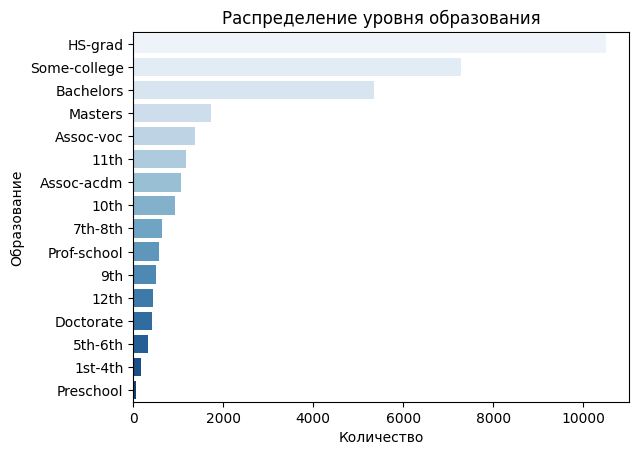

In [ ]:
# 4. Гистограмма распределения образования

sns.countplot(y='education', data=data, order=data['education'].value_counts().index, palette='Blues')
plt.title('Распределение уровня образования')
plt.xlabel('Количество')
plt.ylabel('Образование')
plt.show()


In [ ]:
# 5. Средние значения и СКО возраста для тех, кто получает менее 50K
low_income_stats = data[data['salary'] == '<=50K']['age'].agg(['mean', 'std'])
print("\nСредний возраст и СКО (<=50K):\n", low_income_stats)



Средний возраст и СКО (<=50K):
 mean    36.783738
std     14.020088
Name: age, dtype: float64


In [ ]:
# 6. Люди с зарплатой >50K и высшим образованием
high_income = data[data['salary'] == '>50K']
high_edu = high_income['education'].isin(['Bachelors', 'Prof-school', 'Assoc-acdm',
                                          'Assoc-voc', 'Masters', 'Doctorate']).all()
print("\nВсе ли люди с >50K имеют высшее образование?", high_edu)



Все ли люди с >50K имеют высшее образование? False


In [ ]:
# 7. Статистика возраста для каждой расы и пола
race_sex_stats = data.groupby(['race', 'sex'])['age'].describe()
print("\nСтатистика возраста по расе и полу:\n", race_sex_stats)

# Максимальный возраст мужчин расы Amer-Indian-Eskimo
max_age_amer_indian_men = data[(data['race'] == 'Amer-Indian-Eskimo') &
                               (data['sex'] == 'Male')]['age'].max()
print("\nМаксимальный возраст мужчин Amer-Indian-Eskimo:" max_age_amer_indian_men)



Статистика возраста по расе и полу:
                              count       mean        std   min   25%   50%  \
race               sex                                                       
Amer-Indian-Eskimo Female    119.0  37.117647  13.114991  17.0  27.0  36.0   
                   Male      192.0  37.208333  12.049563  17.0  28.0  35.0   
Asian-Pac-Islander Female    346.0  35.089595  12.300845  17.0  25.0  33.0   
                   Male      693.0  39.073593  12.883944  18.0  29.0  37.0   
Black              Female   1555.0  37.854019  12.637197  17.0  28.0  37.0   
                   Male     1569.0  37.682600  12.882612  17.0  27.0  36.0   
Other              Female    109.0  31.678899  11.631599  17.0  23.0  29.0   
                   Male      162.0  34.654321  11.355531  17.0  26.0  32.0   
White              Female   8642.0  36.811618  14.329093  17.0  25.0  35.0   
                   Male    19174.0  39.652498  13.436029  17.0  29.0  38.0   

                         

82

In [ ]:
# 8. Больше зарабатывающих среди женатых или холостых мужчин?
data['married'] = data['marital-status'].str.startswith('Married')
married_high_income = data[(data['sex'] == 'Male') & (data['salary'] == '>50K')]['married'].mean()
print("\nДоля зарабатывающих >50K среди женатых мужчин:", married_high_income)
print("Доля зарабатывающих >50K среди холостых мужчин:", 1 - married_high_income)



Доля зарабатывающих >50K среди женатых мужчин: 0.8953767637346143
Доля зарабатывающих >50K среди холостых мужчин: 0.10462323626538572


In [ ]:
# 9. Максимальное число часов работы в неделю
max_hours = data['hours-per-week'].max()
max_hours_count = data[data['hours-per-week'] == max_hours].shape[0]
high_income_max_hours = data[(data['hours-per-week'] == max_hours) & (data['salary'] == '>50K')].shape[0]
percent_high_income_max_hours = high_income_max_hours / max_hours_count * 100
print("\nМаксимальное число часов работы:", max_hours)
print("Число людей, работающих такое количество часов:", max_hours_count)
print("Процент зарабатывающих >50K среди них:", percent_high_income_max_hours)



Максимальное число часов работы: 99
Число людей, работающих такое количество часов: 85
Процент зарабатывающих >50K среди них: 29.411764705882355


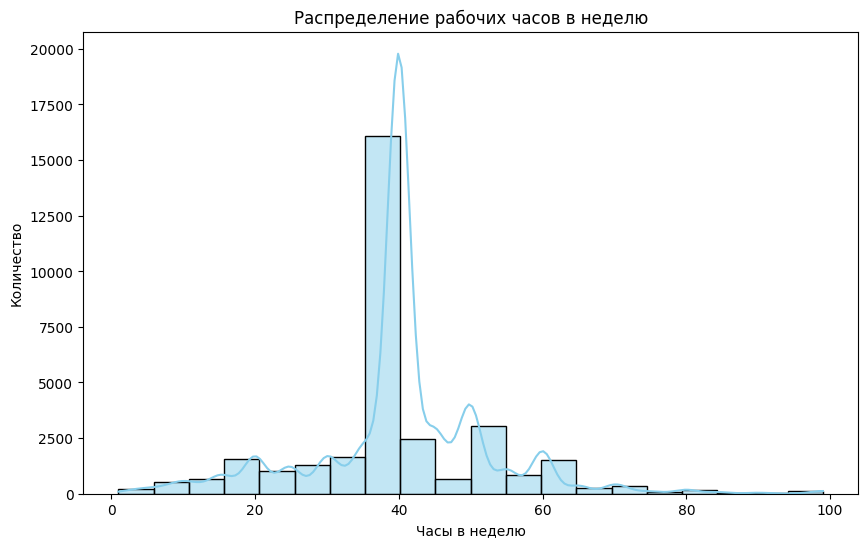

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['hours-per-week'], kde=True, color='skyblue', bins=20)
plt.title('Распределение рабочих часов в неделю')
plt.xlabel('Часы в неделю')
plt.ylabel('Количество')
plt.show()

In [ ]:
# 10. Среднее время работы (hours-per-week) для зарабатывающих мало и много для каждой страны
hours_per_country = data.groupby(['native-country', 'salary'])['hours-per-week'].mean().unstack()
print("\nСреднее время работы по странам:\n", hours_per_country)


Среднее время работы по странам:
 salary                          <=50K       >50K
native-country                                  
Cambodia                    41.416667  40.000000
Canada                      37.914634  45.641026
China                       37.381818  38.900000
Columbia                    38.684211  50.000000
Cuba                        37.985714  42.440000
Dominican-Republic          42.338235  47.000000
Ecuador                     38.041667  48.750000
El-Salvador                 36.030928  45.000000
England                     40.483333  44.533333
France                      41.058824  50.750000
Germany                     39.139785  44.977273
Greece                      41.809524  50.625000
Guatemala                   39.360656  36.666667
Haiti                       36.325000  42.750000
Holand-Netherlands          40.000000        NaN
Honduras                    34.333333  60.000000
Hong                        39.142857  45.000000
Hungary                     31.300

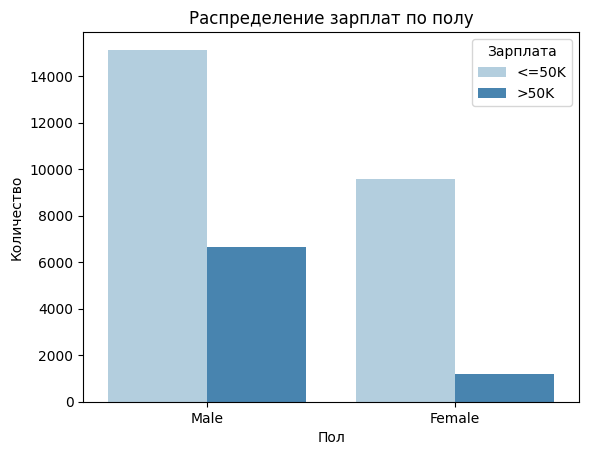

In [ ]:
sns.countplot(x='sex', hue='salary', data=data, palette='Blues')
plt.title('Распределение зарплат по полу')
plt.xlabel('Пол')
plt.ylabel('Количество')
plt.legend(title='Зарплата')
plt.show()

# Выбранный самостоятельно датасет о болезнях сердца

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Загрузка данных
import kagglehub

# Download latest version
path = kagglehub.dataset_download("johnsmith88/heart-disease-dataset", path='heart.csv')

print("Path to dataset files:", path)

data = pd.read_csv(path)
# Предварительный просмотр данных
data.head()


Path to dataset files: /root/.cache/kagglehub/datasets/johnsmith88/heart-disease-dataset/versions/2/heart.csv


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# 1. Сколько мужчин и женщин в датасете?
gender_counts = data['sex'].value_counts()  # 1 = Male, 0 = Female
gender_counts.index = ['Мужчины', 'Женщины']
print("\nМужчины и женщины:\n", gender_counts)



Мужчины и женщины:
 Мужчины    713
Женщины    312
Name: count, dtype: int64


In [ ]:
# 2. Средний возраст женщин
mean_age_women = data[data['sex'] == 0]['age'].mean()
print("\nСредний возраст женщин:", mean_age_women)



Средний возраст женщин: 55.84935897435897


In [ ]:
# 3. Доля пациентов с болезнью сердца (target = 1)
heart_disease_ratio = data['target'].mean()
print("\nДоля пациентов с болезнью сердца:", heart_disease_ratio)



Доля пациентов с болезнью сердца: 0.5131707317073171


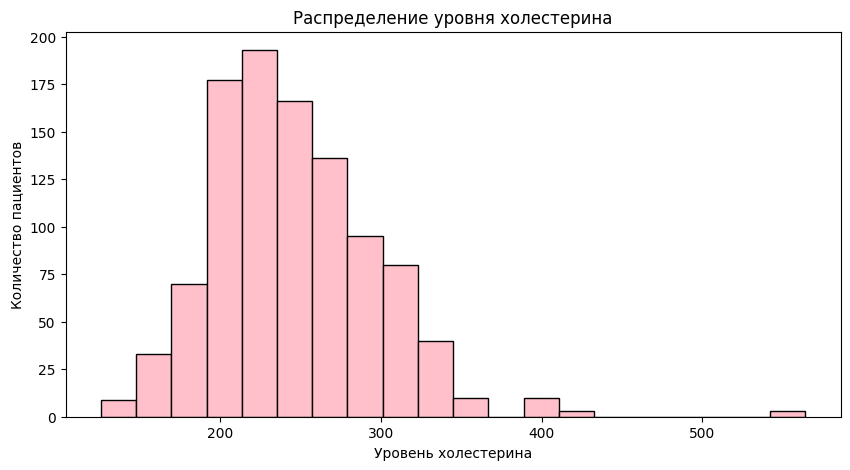

In [ ]:
# 4. Гистограмма распределения уровня холестерина (chol)
plt.figure(figsize=(10, 5))
plt.hist(data['chol'], bins=20, color='pink', edgecolor='black')
plt.title('Распределение уровня холестерина')
plt.xlabel('Уровень холестерина')
plt.ylabel('Количество пациентов')
plt.show()


<ipython-input-109-4486766ffa74>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=data, palette='Reds')


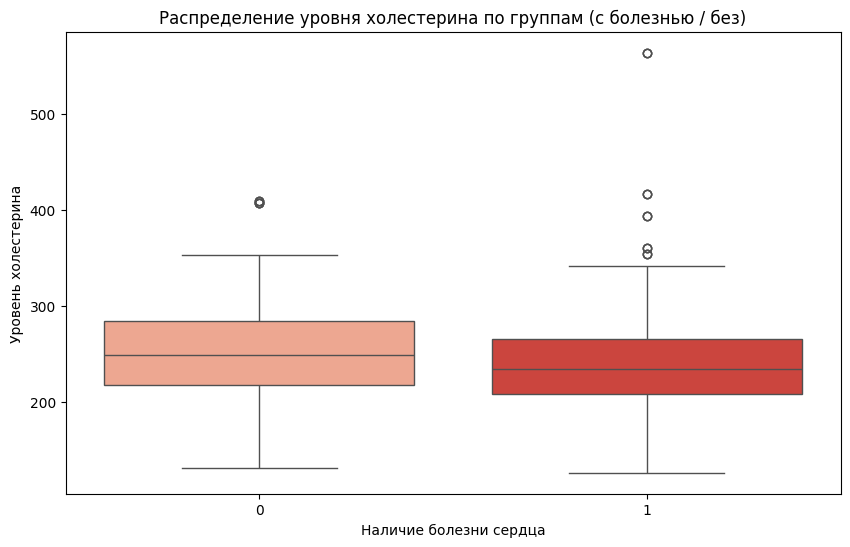

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='target', y='chol', data=data, palette='Reds')
plt.title('Распределение уровня холестерина по группам (с болезнью / без)')
plt.xlabel('Наличие болезни сердца')
plt.ylabel('Уровень холестерина')
plt.show()

In [ ]:
# 5. Средние значения и стандартные отклонения частоты сердечных сокращений (thalach) для пациентов с болезнью сердца (target = 1)
thalach_stats = data[data['target'] == 1]['thalach'].agg(['mean', 'std'])
print("\nСреднее и СКО частоты сердечных сокращений для пациентов с болезнью сердца:\n", thalach_stats)



Среднее и СКО частоты сердечных сокращений для пациентов с болезнью сердца:
 mean    158.585551
std      19.096928
Name: thalach, dtype: float64


In [ ]:
# 6. Правда ли, что все пациенты с болезнью сердца имеют возраст > 30?
all_above_30 = (data[data['target'] == 1]['age'] > 30).all()
print("\nВсе пациенты с болезнью сердца старше 30 лет?", all_above_30)



Все пациенты с болезнью сердца старше 30 лет? False


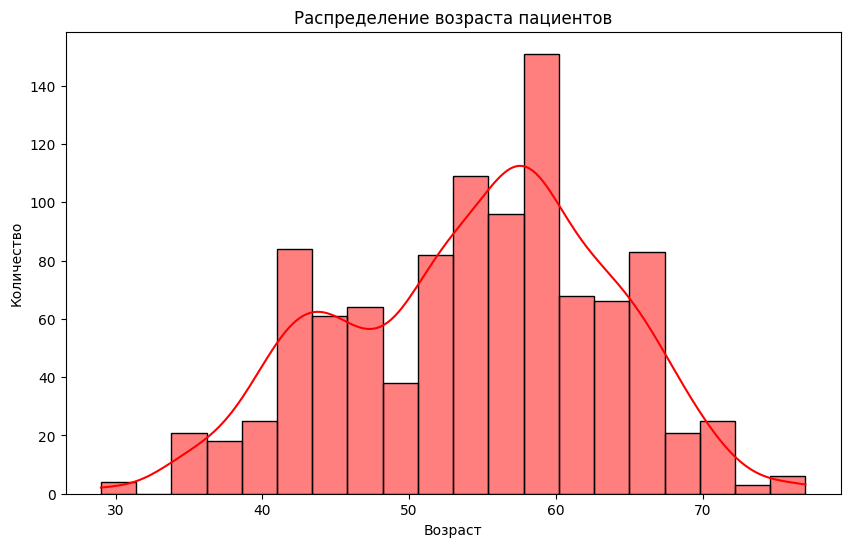

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True, color='red', bins=20)
plt.title('Распределение возраста пациентов')
plt.xlabel('Возраст')
plt.ylabel('Количество')
plt.show()

In [ ]:
# 7. Статистика давления (trestbps) по возрасту и полу
age_sex_stats = data.groupby(['sex', 'age'])['trestbps'].describe()
print("\nСтатистика давления по полу и возрасту:\n", age_sex_stats)



Статистика давления по полу и возрасту:
          count        mean        std    min     25%    50%    75%    max
sex age                                                                  
0   34     3.0  118.000000   0.000000  118.0  118.00  118.0  118.0  118.0
    35     4.0  138.000000   0.000000  138.0  138.00  138.0  138.0  138.0
    37     3.0  120.000000   0.000000  120.0  120.00  120.0  120.0  120.0
    39     7.0  119.142857  23.518989   94.0   94.00  138.0  138.0  138.0
    41    12.0  118.250000  10.609815  105.0  110.25  119.0  127.0  130.0
...        ...         ...        ...    ...     ...    ...    ...    ...
1   67    22.0  131.045455  20.801734  100.0  120.00  122.5  152.0  160.0
    68     9.0  147.333333  26.962938  118.0  118.00  144.0  180.0  180.0
    69     6.0  150.000000  10.954451  140.0  140.00  150.0  160.0  160.0
    70    14.0  146.285714  12.136585  130.0  133.75  145.0  156.0  160.0
    77     3.0  125.000000   0.000000  125.0  125.00  125.0  125.0  12

In [ ]:
# 8. Больше пациентов с болезнью сердца среди мужчин или женщин?
heart_disease_by_gender = data.groupby('sex')['target'].mean()
print("\nДоля пациентов с болезнью сердца среди мужчин:", heart_disease_by_gender[1])
print("Доля пациентов с болезнью сердца среди женщин:", heart_disease_by_gender[0])



Доля пациентов с болезнью сердца среди мужчин: 0.42075736325385693
Доля пациентов с болезнью сердца среди женщин: 0.7243589743589743


In [ ]:
# 9. Максимальная частота сердечных сокращений (thalach)
max_thalach = data['thalach'].max()
max_thalach_count = (data['thalach'] == max_thalach).sum()
print("\nМаксимальная частота сердечных сокращений:", max_thalach)
print("Число людей с максимальной частотой:", max_thalach_count)



Максимальная частота сердечных сокращений: 202
Число людей с максимальной частотой: 4


In [ ]:
# 10. Среднее время (в данном случае частота сердечных сокращений) для пациентов с и без болезни сердца для каждого пола
thalach_by_gender_heart = data.groupby(['sex', 'target'])['thalach'].mean().unstack()
print("\nСредняя частота сердечных сокращений по полу и наличию болезни сердца:\n", thalach_by_gender_heart)



Средняя частота сердечных сокращений по полу и наличию болезни сердца:
 target           0           1
sex                           
0       142.348837  154.057522
1       138.460048  161.996667


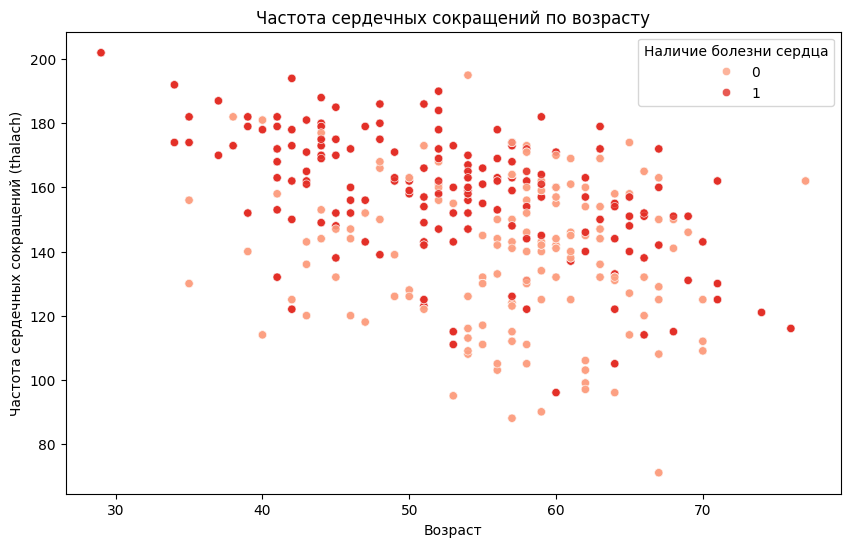

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=data, palette='Reds', alpha=0.8)
plt.title('Частота сердечных сокращений по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота сердечных сокращений (thalach)')
plt.legend(title='Наличие болезни сердца')
plt.show()